In [1]:
import numpy as np
import matplotlib.pyplot as plt

## SVD
The purpose of the SVD is to decompose a matrix into the product of three matrices, called  the  left  singular  vectors  (U),  the  singular values  (Σ),  and  the  right  singular vectors (V):
$$ A = UΣV^T$$<br>
This  decomposition  should  look  similar  to  eigendecomposition.  In  fact,  you  can think of the SVD as a generalization of eigendecomposition to non square matrices or  you  can  think  of  eigendecomposition  as  a  special  case  of  the  SVD  for  square matrices.<br>
The singular values are comparable to eigenvalues, while the singular vectors matrices are comparable to eigenvectors.

## The Big Picture of the SVD
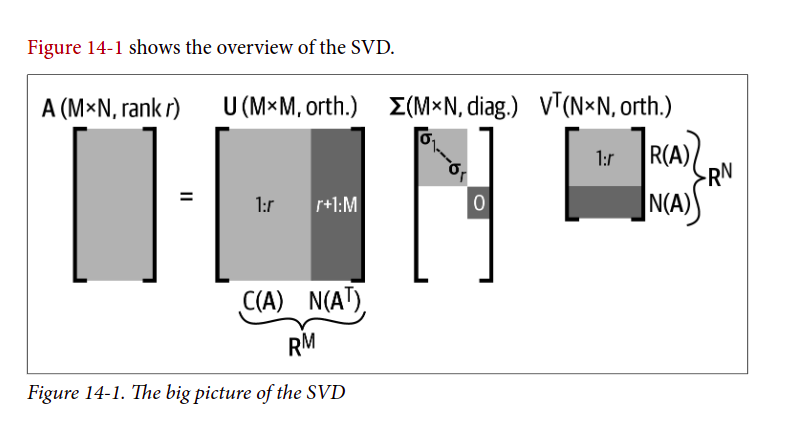<br>
Many  important  features  of  the  SVD  are  visible  in  the above  diagram:-
1. Both U and V are square matrices, even when A is nonsquare.
2. The matrices of singular vectors U and V are orthogonal, meaning $U^TU=I and V^TV=I$. As a reminder, this means that each column is orthogonal to each other column, and any subset of columns is orthogonal to any other (non overlapping)subset of columns.
3. The first r columns of U provide orthogonal basis vectors for the column space of the matrix A, while the rest of the columns provide orthogonal basis vectors for the left-null space (unless r = M, in which case the matrix is full column-rank and the left-null space is empty).
4. The  first  r  rows  of  $V^T$  (which  are  the  columns  of  V)  provide  orthogonal  basis vectors  for  the  row  space,  while  the  rest  of  the  rows  provide  orthogonal  basis vectors for the null space.
5. The  singular  values  matrix  is  a  diagonal  matrix  of  the  same  size  as  A.  The singular values are always sorted from largest (top-left) to smallest (lower-right).
6. All singular values are non negative and real-valued. They cannot be complex or negative, even if the matrix contains complex-valued numbers.
7. The number of nonzero singular values equals the matrix rank.<br>

Perhaps the most amazing thing about the SVD is that it reveals all four subspaces of the  matrix:  the  column  space  and  left-null  space  are  spanned  by  the  first  r  and  last M  −  r  through  M  columns  of  U,  while  the  row  space  and  null  space  are  spanned  by the  first  r  and  last  N  −  r  through  N  rows  of  $V^T$.  For  a  rectangular  matrix,  if  r  =  M, then the left-null space is empty, and if r = N, then the null space is empty.

## Singular Values and Matrix Rank
The rank of a matrix is defined as the number of nonzero singular values. The reason comes  from  the  previous  discussion  that  the  column  space  and  the  row  space  of the  matrix  are  defined  as  the  left  and  right  singular  vectors  that  are  scaled  by  their corresponding  singular  values  to  have  some  “volume”  in  the  matrix  space,  whereas the  left  and  right  null  spaces  are  defined  as  the  left  and  right  singular  vectors  that are  scaled  to  zeros.  Thus,  the  dimensionality  of  the  column  and  row  spaces  are determined by the number of nonzero singular values.<br>
In  fact,  we  can  peer  into  the  NumPy  function  np.linalg.matrix_rank  to  see  how Python  computes  matrix  rank  (I’ve  edited  the  code  slightly  to  focus  on  the  key concepts):<br>
### S = svd(M,compute_uv=False) # return only singular values<br>tol = S.max() * max(M.shape[-2:]) * finfo(S.dtype).eps<br>return count_nonzero(S > to)
The  returned  value  is  the  number  of  singular  values  that  exceed  the  value  of  tol. What  is  tol? 
### That’s  a  tolerance  level  that  accounts  for  possible  rounding  errors.  It is  defined  as  the  machine  precision  for  this  data  type  (eps),  scaled  by  the  largest singular value and the size of the matrix.<br>
Thus, we yet again see the difference between “chalkboard math” and precision math implemented  on  computers:  the  rank  of  the  matrix  is  not  actually  computed  as  the number  of  nonzero  singular  values,  but  instead  as  the  number  of  singular  values that  are  larger  than  some  small  number.  There  is  a  risk  that  small  but  truly  nonzero singular  values  are  ignored,  but  that  outweighs  the  risk  of  incorrectly  inflating  the rank  of  the  matrix  when  truly  zero-valued  singular  values  appear  nonzero  due  to precision errors.

### SVD in Python
The SVD is fairly straightforward to compute in Python:
U,s,Vt = np.linalg.svd(A)
There  are  two  features  of  NumPy’s  svd  function  to  keep  in  mind.  First,  the  singular values  are  returned  as  a  vector,  not  a  matrix  of  the  same  size  as  A.  This  means  that you need some extra code to get the Σ matrix:
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)
<br>
You  might  initially  think  of  using  np.diag(s),  but  that  only  produces  the  correct singular  values  matrix  for  a  square  matrix  A.  Therefore,  I  first  create  the  correctly sized matrix of zeros, and then fill in the diagonal with the singular values.<br>
The  second  feature  is  that  NumPy  returns  the  matrix  $V^T$,  not  V.  This  may  be confusing  for  readers  coming  from  a  MATLAB  background,  because  the  MATLAB svd  function  returns  the  matrix  V.  The  hint  is  in  the  docstring,  which  describes matrix  vh,  where  the  h  is  for  Hermitian,  the  name  of  a  symmetric  complex-valued matrix.
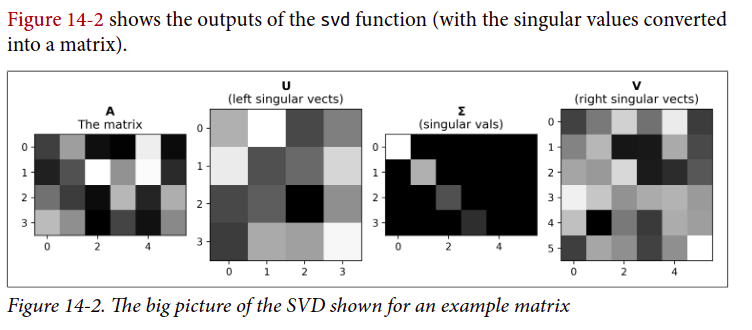

## SVD and Rank-1 “Layers” of a Matrix
The  first  equation  I  showed  in  the  previous  chapter  was  the  vector-scalar  version of  the  eigenvalue  equation  (Av=λv).  I  opened  this  chapter  with  the  matrix  SVD equation $(A=UΣV^T)$; what does that equation look like for one vector? We can write it in two different ways that highlight different features of the SVD:
$$
Av=uσ
$$
$$
u^TA=σv^T
$$<br>
Those  equations  are  kind  of  similar  to  the  eigenvalue  equation  except  that  there  are two vectors instead of one. The interpretations are, therefore, slightly more nuanced:in general, those equations say that<b> the effect of the matrix on one vector is the same as the effect of a scalar on a different vector.</b><br>
Notice that the first equation means that u is in the column space of A, with v providing the weights for combining the columns. The same goes for the second equation, but vis in the row space of A with u providing the weights.<br>
But that’s not what I want to focus on in this section; I want to consider what happens when  you  multiply  one  left  singular  vector  by  one  right  singular  vector.  Because  the singular vectors are paired with the same singular value, we need to multiply the ith left singular vector by the ith singular value by the ith right singular vector.<br>
Note the orientations in this vector-vector multiplication: column on the left, row on the  right  (Figure  14-3).  That  means  that  the  result  will  be  an  outer  product  of  the same  size  as  the  original  matrix.  Furthermore,  that  outer  product  is  a  rank-1  matrix whose  norm  is  determined  by  the  singular  value  (because  the  singular  vectors  are unit-length):<br>
$$ u_1σ_1v_1^T = A_1$$<br>
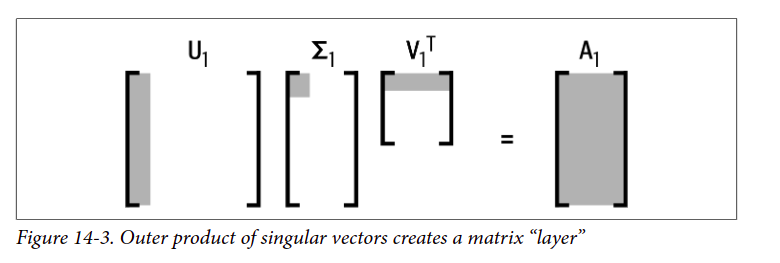<br>
The  subscripted  1  in  the  equation  indicates  using  the  first  singular  vectors  and  first (largest)  singular  value.  I  call  the  result  $A_1$  because  it’s  not  the  original  matrix  A; instead, it’s a rank-1 matrix of the same size as A. And not just any rank-1 matrix— it is the most important “layer” of the matrix.<b> It’s the most important because it has the largest singular value.</b><br>
With  this  in  mind,  we  can  reconstruct  the  original  matrix  by  summing  all  SVD “layers” associated with $σ > 0^2$:
$$ A = \sum_{i=1}^{r} u_i \sigma_i v_i^T$$<br>
The  point  of  showing  this  summation  is  that  you  don’t  necessarily  need  to  use  all  r layers;  instead,  you  can  reconstruct  some  other  matrix,  let’s  call  it  $\tilde{A}$,  which  contains the first k < r layers. <b>This is called a low-rank approximation of matrix A—in this case, a rank-k approximation.</b><br>
Low-rank  approximations  are  used,  for  example,  in  data  cleaning.  The  idea  is  that information  associated  with  small  singular  values  makes  little  contribution  to  the total  variance  of  the  dataset,  and  therefore  might  reflect  noise  that  can  be  removed.

## SVD from EIG
The SVD is really easy (conceptually; performing an SVD by hand is another matter). It simply comes from computing the eigendecomposition of the matrix times its transpose. The following equations show how to derive the singular values and theleft singular vectors:<br>
$$
AA^T=(UΣV^T)(UΣV^T)^T
$$
$$
= UΣV^TVΣ^TU^T
$$
$$
= UΣ^2U^T
$$<br>
In  other  words,  the  eigenvectors  of  $AA^T$  are  the  left-singular  vectors  of  A,  and  the squared eigenvalues of $AA^T$ are the singular values of A.<br>
This  insight  reveals  three  features  of  the  SVD:  <br>(1)  singular  values  are  non-negative because  squared  numbers  cannot  be  negative,  <br>(2)  singular  values  are  real-valued because symmetric matrices have real-valued eigenvalues, and <br>(3) singular vectors are orthogonal because the eigenvectors of a symmetric matrix are orthogonal.<br>
The right-singular values come from premultiplying the matrix transpose:<br>
$$
A^TA = (UΣV^T)^T(UΣV^T)
$$
$$
= VΣ^TU^TUΣV^T
$$
$$
= VΣ^2V^T
$$<br>
In  fact,  you  can  rearrange  the  SVD  equation  to  solve  for  the  right-singular  vectors without having to compute the eigendecomposition of $A^TA$:
$$ V^T=Σ^{−1}U^TA$$<br>
Of course, there is a complementary equation for deriving U if you already know V.

## SVD of $A^TA$
Briefly,  if  a  matrix  can  be  expressed  as  $S=A^TA$,  then  its  left-  and  right-singular vectors are equal. In other words:<br>
$$ S = UΣV^T = VΣU^T = UΣU^T = VΣV^T $$<br>
The proof of this claim comes from writing out the SVD of $S$ and $S^T$, then considering  the  implication  of  $S=S^T$<br>
In  fact,  for  a  symmetric  matrix,  SVD  is  the  same  thing  as  eigendecomposition.  This has  implications  for  principal  components  analysis,  because  PCA  can  be  performed using  eigendecomposition  of  the  data  covariance  matrix,  the  SVD  of  the  covariance matrix, or the SVD of the data matrix.<br>

# Converting Singular Values to Variance, Explained
The sum of the singular values is the total amount of “variance” in the matrix. What does that mean? If you think of the information in the matrix as being contained in a bubble, then the sum of the singular values is like the volume of that bubble.<br>
The reason why all the variance is contained in the singular values is that the singular vectors  are  normalized  to  unit  magnitude,  which  means  they  provide  no  magnitude information  (that  is,  ∥Uw∥=∥w∥). In  other  words,  the  singular  vectors  point,and the singular values say how far.<br>
The  “raw”  singular  values  are  in  the  numerical  scale  of  the  matrix.  That  means  that if  you  multiply  the  data  by  a  scalar,  then  the  singular  values  will  increase.  And  this in  turn  means  that  the  singular  values  are  difficult  to  interpret,  and  are  basically impossible to compare across different datasets.<br>
For  this  reason,  it  is  often  useful  to  convert  the  singular  values  to  percent  total variance  explained.  The  formula  is  simple;  each  singular  value  i  is  normalized  as follows:
$$ \tilde{σ} = 100 σ_i / {Σσ}  $$<br>
This  normalization  is  common  in  principal  components  analysis,  for  example,  to determine the number of components that account for 99% of the variance. That can be interpreted as an indicator of system complexity. Importantly,  this  normalization  does  not  affect  the  relative  distances  between  singular values; it merely changes the numerical scale into one that is more readily interpretable.<br>

## Condition Number
The condition number of a matrix is used to indicate the numerical stability of a matrix. Now that you know about singular values,you can better appreciate how to compute and interpret the condition number.<br>
The condition number of a matrix is defined as the ratio of the largest to the smallest singular value. It’s often given the letter κ (Greek letter kappa):
$$ \kappa = \sigma_{max} / \sigma_{min}$$<br>
The condition number is often used in statistics and machine learning to evaluate the stability  of  a  matrix  when  computing  its  inverse  and  when  using  it  to  solve  systems of  equations  (e.g.,  least  squares).  Of  course,  a  noninvertible  matrix  has  a  condition number of NaN because σ/0 =‽.<br>
But  a  numerically  full-rank  matrix  with  a  large  condition  number  can  still  be  unstable. Though theoretically invertible, in practice the matrix inverse may be unreliable. Such  matrices  are  called  ill-conditioned.  You  might  have  seen  that  term  in  warning messages in Python, sometimes accompanied by phrases like “result is not guaranteed to be accurate.”<br>
What’s the problem with an ill-conditioned matrix? As the condition number increases,  the  matrix  tends  toward  being  singular.  Therefore,  an  ill-conditioned  matrix  is “almost  singular”  and  its  inverse  becomes  untrustworthy  due  to  the increased  risk  of numerical errors.<br>
There  are  a  few  ways  to  think  about  the  impact  of  an  ill-conditioned  matrix.  One  is as the decrease in the precision of a solution due to round-off errors. For example, a condition number on the order of $10^5$ means that the solution (e.g., the matrix inverse
or  least  squares  problem)  loses  five  significant  digits  (this  would  mean,  for  example, going from a precision of 10^{−16} to 10^{−11}).<br>
A  second  interpretation,  related  to  the  previous,  is  as  an  amplification  factor  for noise.  If  you  have  a  matrix  with  a  condition  number  on  the  order  of  $10^4$,  then  noise could impact the solution to a least squares problem by $10^4$. That might sound like a lot, but it could be an insignificant amplification if your data has a precision of $10^{−16}$.<br>
Thirdly, the condition number indicates the sensitivity of a solution to perturbations in  the  data  matrix.  A  well-conditioned  matrix  can  be  perturbed  (more  noise  added) with minimal change in the solution. In contrast, adding a small amount of noise to an ill-conditioned matrix can lead to wildly different solutions.<br>
What  is  the  threshold  for  a  matrix  to  be  ill-conditioned?  There  is  none.  There  is no  magic  number  that  separates  a  well-conditioned  from  an  ill-conditioned  matrix. Different  algorithms  will  apply  different  thresholds  that  depend  on  the  numerical values in the matrix. This  much  is  clear:  take  warning  messages  about  ill-conditioned  matrices  seriously. They usually indicate that something is wrong and the results should not be trusted.<br>

# What to Do About Ill-Conditioned Matrices?
That’s  unfortunately  not  a  question  I  can  give  a  specific  answer  to.  The  right  thing to  do  when  you  have  an  ill-conditioned  matrix  depends  a  lot  on  the  matrix  and on  the  problem  you’re  trying  to  solve.  To  be  clear:  ill-conditioned  matrices  are  not intrinsically  bad,  and  you  should  never  flippantly  discard  a  matrix  simply  because of  its  condition  number.  An  ill-conditioned  matrix  is  only  potentially  problematic for  certain  operations,  and  therefore  is  only  relevant  for  certain  matrices,  such  as statistical design matrices or covariance matrices. Treatment options for an ill-conditioned matrix include regularization, dimensionality reduction, and improving data quality or feature extraction.

# SVD and the MP Pseudoinverse
The  SVD  of  a  matrix  inverse  is  quite  elegant.  Assuming  the  matrix  is  square  and invertible, we get:
$$ A^{-1} = (UΣV^T)^{-1}$$
$$ = VΣ^{−1}U^{−1}$$
$$ = VΣ^{−1}U^T$$<br>
In other words, we only need to invert Σ, because $U^{−1}=U^T$. Furthermore, because Σ is a diagonal matrix, its inverse is obtained simply by inverting each diagonal element. On the other hand, this method is still subject to numerical instabilities, because tiny singular values that might reflect precision errors (e.g., $10^{−15}$) become galactically large when inverted.<br>
The  MP  pseudoinverse  is  computed  almost  exactly  as  the  full  inverse  shown  in  the previous  example;  the  only  modification  is  to  invert  the  nonzero  diagonal  elements in  Σ  instead  of  trying  to  invert  all  diagonal  elements.  (In  practice,  “nonzero”  is implemented as above a threshold to account for precision errors.)<br>
Even  better:  because  the  SVD  works  on  matrices  of  any  size,  the  MP  pseudoinverse can  be  applied  to  nonsquare  matrices.  In  fact,  the  MP  pseudoinverse  of  a  tall  matrix equals  its  left-inverse,  and  the  MP  pseudoinverse  of  a  wide  matrix  equals  its  right-inverse. (Quick reminder that the pseudoinverse is indicated as A+, A*, or A†.)

# Code Exercises

### Question 14-1. You  learned  that  for  a  symmetric  matrix,  the  singular  values  and  the  eigenvalues  are the  same.  How  about  the  singular  vectors  and  eigenvectors?  Use  Python  to  answer this question using a random 5 × 5 $A^TA$ matrix. Next, try it again using the additive method  for  creating  a  symmetric  matrix  $(A^T+A)$.  Pay  attention  to  the  signs  of  the eigenvalues of $A^T+A$.

In [2]:
# create a symmetric matrix
A = np.random.randn(5,5)
A = A.T@A
A = A+A.T 

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# sorting them helps the comparison!
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]



# SVD
U,s,Vt = np.linalg.svd(A)

# compare the eigenvalues and singular values
print('Eigenvalues and singular values:')
print(np.vstack((evals,s)).T)

# now compare the left and right singular vectors
print(f'\nLeft-Right singular vectors (should be zeros)')
print(np.round(U-Vt.T,10)) # remember to compare V not V^T!

# then compare singular vectors with eigenvectors
print(f'\nSingular vectors - eigenvectors (should be zeros)')
print(np.round(U-evecs,10)) # subtract and 
print(' ')                  
print(np.round(U+evecs,10)) # add for sign indeterminancy


Eigenvalues and singular values:
[[25.18242223 25.18242223]
 [13.13709527 13.13709527]
 [11.42218238 11.42218238]
 [ 3.92932391  3.92932391]
 [ 1.33944528  1.33944528]]

Left-Right singular vectors (should be zeros)
[[ 0.  0. -0.  0. -0.]
 [-0.  0. -0. -0. -0.]
 [ 0.  0.  0. -0.  0.]
 [-0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

Singular vectors - eigenvectors (should be zeros)
[[-0.56870613 -0.          0.32067448 -0.          0.        ]
 [ 1.30768931  0.          1.04733628  0.         -0.        ]
 [-0.76346339  0.         -0.354266    0.         -0.        ]
 [ 1.17253715  0.         -1.3204093   0.          0.        ]
 [-0.09382047  0.         -0.96502304  0.          0.        ]]
 
[[-0.         -1.87614835 -0.         -0.20950221 -0.09958626]
 [-0.         -0.31624672  0.          0.43305199  0.95157204]
 [ 0.         -0.052697    0.          1.69251225  0.65134059]
 [-0.         -0.60152909 -0.          0.45045286 -0.56296614]
 [-0.         -0.12426253  0.         -0.837298

### Question 14-2. Python  can  optionally  return  the  “economy”  SVD,  which  means  that  the  singular vectors  matrices  are  truncated  at  the  smaller  of  M  or  N.  Consult  the  docstring  to figure out how to do this. Confirm with tall and wide matrices. Note that you would typically want to return the full matrices; economy SVD is mainly used for really large matrices and/or really limited computational power.

In [3]:
# sizes (try tall and wide)
m = 10
n = 4

# random matrix and its economy (aka reduced) SVD
A = np.random.randn(m,n)
U,s,Vt = np.linalg.svd(A,full_matrices=False)

# print sizes
print(f'Size of A:  {A.shape}')
print(f'Size of U:  {U.shape}')
print(f"Size of V': {Vt.shape}")

Size of A:  (10, 4)
Size of U:  (10, 4)
Size of V': (4, 4)


### Question 14-3. One  of  the  important  features  of  an  orthogonal  matrix  (such  as  the  left  and  right singular  vectors  matrices)  is  that  they  rotate,  but  do  not  scale,  a  vector.  This  means that  the  magnitude  of  a  vector  is  preserved  after  multiplication  by  an  orthogonal matrix.  Prove  that  ∥U w∥ = ∥w∥.  Then  demonstrate  this  empirically  in  Python by  using  a  singular  vectors  matrix  from  the  SVD  of  a  random  matrix  and  a  random vector.

In [4]:
# The proof that |Uw|=|w| comes from expanding the vector magnitude to the dot product:
# |Uw|^2 = (Uw)'(Uw) = w'U'U'w = w'Iw = w'w = |w|^2


# empirical demonstration:
U,s,Vt = np.linalg.svd(np.random.randn(5,5))
w = np.random.randn(5,1)

# print out the norms
print( np.linalg.norm(U@w) )
print( np.linalg.norm(  w) )

1.344975639354919
1.3449756393549193


### Question 14-4. Create  a  random  tall  matrix  with  a  specified  condition  number.  Do  this  by  creating two  random  square  matrices  to  be  U  and  V,  and  a  rectangular  Σ.  Confirm  that the  empirical  condition  number  of  $UΣV^T$  is  the  same  as  the  number  you  specified. Visualize your results in a figure like Figure 14-4. (I used a condition number of 42.)
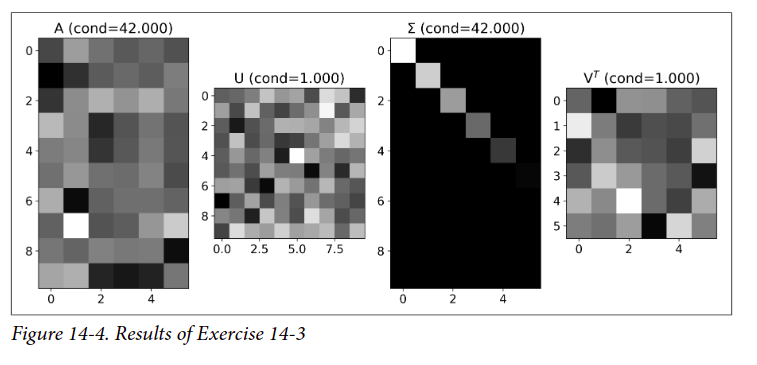

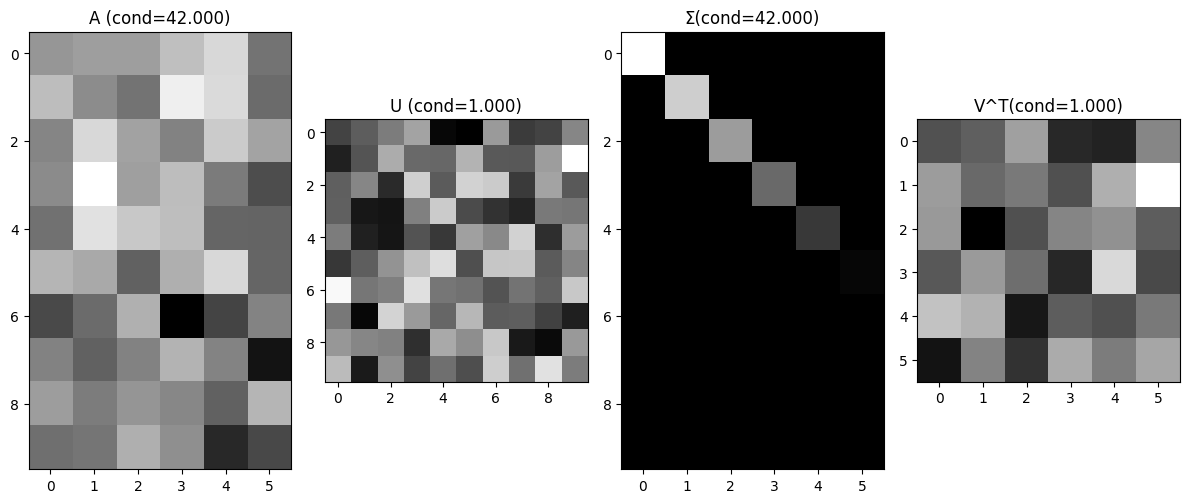

In [5]:
# create a tall matrix with specified condition number
m = 10
n = 6

condnum = 42

# create U and V from random numbers
U,_  = np.linalg.qr( np.random.randn(m,m) )
Vt,_ = np.linalg.qr( np.random.randn(n,n) )

# create singular values vector
s = np.linspace(condnum,1,np.min((m,n)))

# convert into a matrix
S = np.zeros((m,n))
np.fill_diagonal(S,s)

# create matrix
A = U@S@Vt

# and show in a plot
_,axs = plt.subplots(1,4,figsize=(12,6))

axs[0].imshow(A, aspect='equal', cmap='gray')
axs[0].set_title(f'A (cond={np.linalg.cond(A):.3f})')

axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title(f'U (cond={np.linalg.cond(U):.3f})')

axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title(f'Σ(cond={np.linalg.cond(S):.3f})')

axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title(f'V^T(cond={np.linalg.cond(Vt):.3f})')


plt.tight_layout()
plt.show()

### Question 14-5. Your goal here is simple: write code to reproduce Figure 14-5. What does this figures how?  Panel  A  shows  a  30 × 40  random  matrix  that  I  created  by  smoothing  random numbers  (implemented  as  the  2D  convolution  between  a  2D  Gaussian  and  random numbers;  if  you  are  not  familiar  with  image  processing  and  filtering,  then  please feel  free  to  copy  the  code  to  create  this  matrix  from  my  code  solution).  The  rest of  panel  A  shows  the  SVD  matrices.  It’s  interesting  to  note  that  the  earlier  singular vectors (associated with the larger singular values) are smoother while the later ones are more rugged; this comes from the spatial filtering.<br>Panel  B  shows  a  “scree  plot,”  which  is  the  singular  values  normalized  to  percent variance  explained.  Notice  that  the  first  few  components  account  for  most  of  the variance  in  the  image,  while  the  later  components  each  account  for  relatively  little variance.  Confirm  that  the  sum  over  all  normalized  singular  values  is  100.  <br>Panel  C shows the first four “layers”—rank-1 matrices defined as $u_iσ_iv_i^T$ —on the top row and the  cumulative  sum  of  those  layers  on  the  bottom  row.  You  can  see  that  each  layer adds more information to the matrix; the lower-right image (titled “L 0:3”) is a rank-4 matrix and yet appears visually very similar to the original rank-30 matrix in panel A.<br>
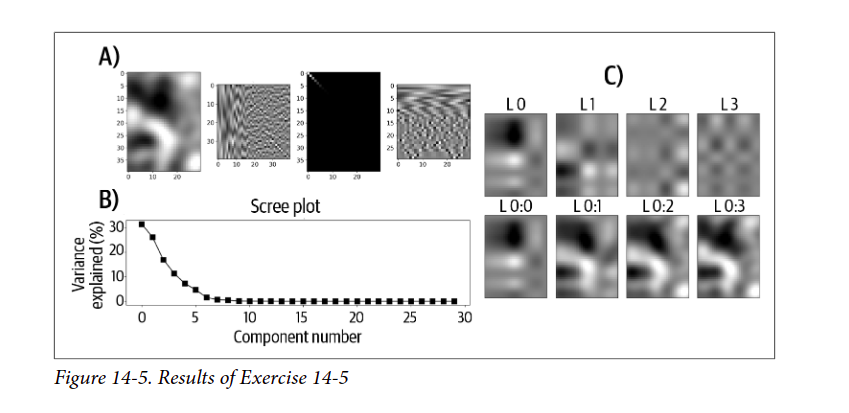

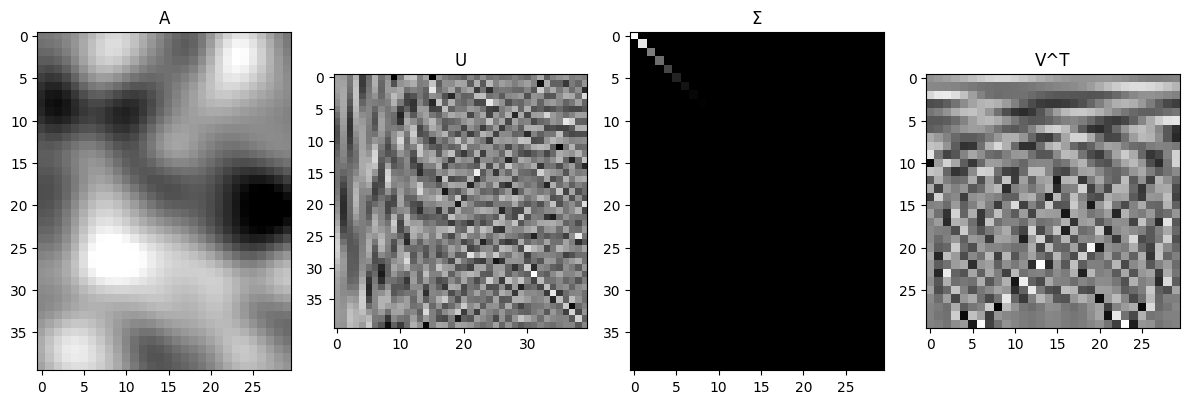

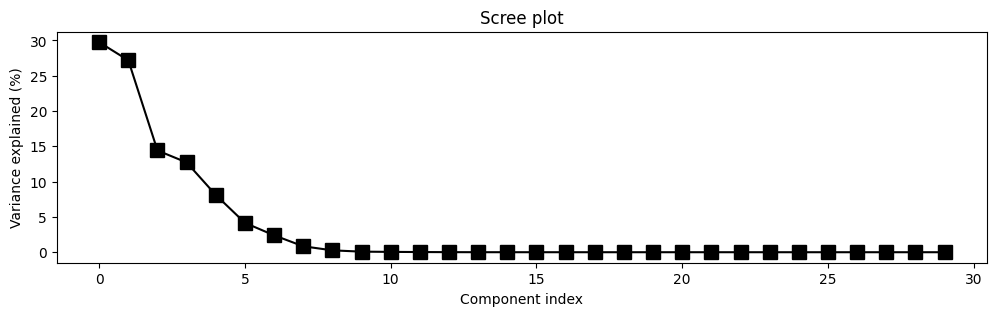

In [6]:
# create the matrix
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )


# now for the matrix
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n),g2d,mode='same')


# SVD and create Sigma
U,s,Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)


# visualize the matrices

# and show in a plot
_,axs = plt.subplots(1,4,figsize=(12,6))

axs[0].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[0].set_title('A')

axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')

axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title('Σ')

axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('V^T')


plt.tight_layout()
plt.show()


# and show the scree plot
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s),'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')
plt.show()


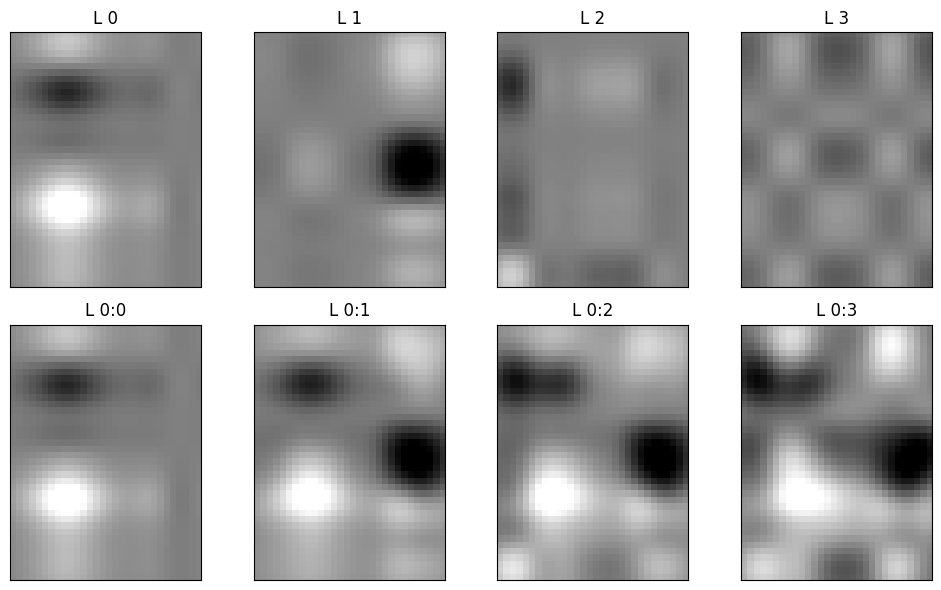

In [7]:
## now show the first N "layers" separately and summed

numLayers = 4
rank1mats = np.zeros((numLayers,m,n))


# setup the figure
_,axs = plt.subplots(2,numLayers,figsize=(10,6))

# the loop
for i in range(numLayers):
    
    # create this layer
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*S[i,i]
    
    # show this layer
    axs[0,i].imshow(rank1mats[i,:,:],cmap='gray', vmin=-10,vmax=10)
    axs[0,i].set_title(f'L {i}')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([])

    # show the cumulative sum of layers
    axs[1,i].imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray', vmin=-10,vmax=10)
    axs[1,i].set_title(f'L 0:{i}')
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])


plt.tight_layout()
plt.show()

### Question 14-6. Implement  the  MP  pseduoinverse  based  on  the  description  in  this  chapter.  You’ll need  to  define  a  tolerance  to  ignore  tiny-but-nonzero  singular  values.  Please  don’t look  up  NumPy’s  implementation— and  don’t  check  back  to  earlier  code  in  this chapter—but instead use your knowledge of linear algebra to come up with your own tolerance.Test  your  code  on  a  5 × 5  rank-3  matrix.  Compare  your  result  against  the  output  of NumPy’s pinv function. Finally, inspect the source code for np.linalg.pinv to make sure you understand the implementation.

In [8]:
# singular matrix
A = np.random.randn(5,3) @ np.random.randn(3,5)

# its SVD
U,s,Vt = np.linalg.svd(A)

# define a threshold (tolerance) for "zero-valued" singular values
# I thought of using eps scaled by the size of A. Numpy fixed this to 10^-15, 
# which means it is not adapted to different computer precisions.
tol = np.finfo(float).eps * np.max(A.shape)

# invert the supra-threshhold sigma's
sInv = np.zeros_like(s)
sInv[s>tol] = 1/s[s>tol]

# reconstruct
S = np.zeros_like(A)
np.fill_diagonal(S,sInv)
Apinv = Vt.T @ S @ U.T

# compare to pinv()
ApinvNp = np.linalg.pinv(A)

print(np.round( ApinvNp - Apinv ,5))

[[ 0. -0.  0.  0.  0.]
 [-0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. -0. -0.]
 [ 0.  0.  0. -0.  0.]]


In [9]:
??np.linalg.pinv

Signature: np.linalg.pinv(a, rcond=1e-15, hermitian=False)
Source:   
@array_function_dispatch(_pinv_dispatcher)
def pinv(a, rcond=1e-15, hermitian=False):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.

    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.

    .. versionchanged:: 1.14
       Can now operate on stacks of matrices

    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to 

### Question 14-7. Demonstrate that the MP pseudoinverse equals the left-inverse for a full column-rank matrix by computing the explicit left-inverse of a tall full matrix $(A^TA^{−1}A^T)$ and the pseudoinverse of A. Repeat for the right inverse with a wide full row-rank matrix.

In [10]:
# left-inverse
A = np.random.randn(6,4)

# explicit left inverse
Linv = np.linalg.inv(A.T@A)@A.T

# pinv
Apinv = np.linalg.pinv(A)

# compare
print(np.round( Linv - Apinv ,5))
# right-inverse
A = np.random.randn(4,6)

# explicit right inverse
Rinv = A.T@np.linalg.inv(A@A.T)

# pinv
Apinv = np.linalg.pinv(A)

# compare
print(np.round( Rinv - Apinv ,5))

[[ 0.  0.  0. -0.  0.  0.]
 [ 0.  0. -0. -0. -0.  0.]
 [ 0.  0.  0.  0. -0. -0.]
 [ 0. -0. -0. -0. -0.  0.]]
[[-0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [-0.  0. -0. -0.]
 [-0. -0.  0. -0.]
 [ 0.  0.  0.  0.]
 [-0.  0. -0. -0.]]


### Question 14-8.Consider the eigenvalue equation Av=λv. Now that you know about the pseudoin‐verse, you can play around with that equation a bit. In particular, use the 2 × 2 matrixused  at  the  outset  of  Chapter  13  to  compute  $v^+$  and  confirm  that  $vv^+= 1$.  Next,confirm the following identities:
$$ v^+Av=λv^+v$$
$$ Avv^+=λvv^+$$

In [11]:
# the matrix (from chapter 12)
M = np.array([ [-1,1],
               [-1,2] ])

# its eigendecomposition
evals,evecs = np.linalg.eig(M)
l = evals[1]     # extract lambda1 for convenience
v = evecs[:,[1]] # extract v1 for convenience

LHS = M@v
RHS = l*v

# print out the two sides (as row vectors for visual convenience)
print(LHS.T)
print(RHS.T)


[[-0.57735027 -1.51152263]]
[[-0.57735027 -1.51152263]]


In [12]:
# pinv(v)
vPinv = np.linalg.pinv(v)

# check
vPinv@v

array([[1.]])

In [13]:
# first equation
LHS = vPinv @ M @ v
RHS = l * vPinv @ v

# these results are scalars (quadratic form)
print(LHS)
print(RHS)

[[1.61803399]]
[[1.61803399]]


In [14]:
# second equation
LHS = M @ v @ vPinv
RHS = l * v @ vPinv

# these results are matrices
print(LHS), print(' ')
print(RHS)

[[0.20601133 0.53934466]
 [0.53934466 1.41202266]]
 
[[0.20601133 0.53934466]
 [0.53934466 1.41202266]]
